In [39]:
import numpy as np
import scipy as sp
import scipy.stats as sts
import matplotlib.pyplot as plt



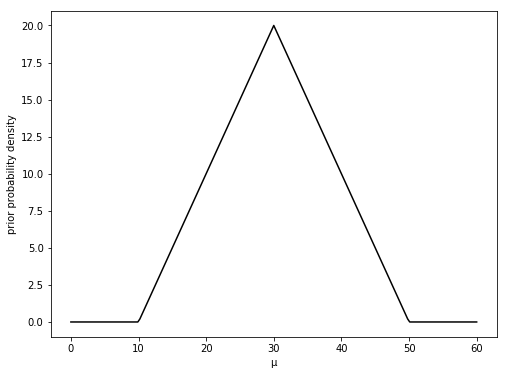

In [40]:

mu = np.linspace(0, 60, 201)

# The prior is greater than 0 in the range (0, 50) based on our guess.
prior = np.where(
    mu > 10,
    np.where(
        mu < 30, mu - 10,
        np.where(
            mu < 50, 50 - mu, 0)),
    0)

plt.figure(figsize=(8, 6))
plt.plot(mu, prior, color='black')
plt.xlabel('μ')
plt.ylabel('prior probability density')
plt.show()
%matplotlib inline

Area under the unnormalized prior curve: 400.02000000000004


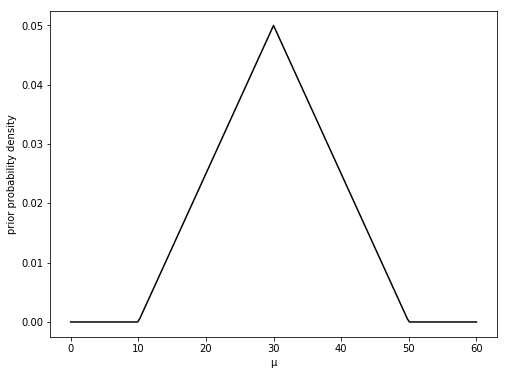

In [41]:

# Remember the unnormalized values
unnormalized_prior = prior

# Use the trapezoid rule to compute the integral of the unnormalized prior
area = sp.integrate.trapz(unnormalized_prior, mu)
print('Area under the unnormalized prior curve:', area)

# Normalize the prior
prior = unnormalized_prior / area

plt.figure(figsize=(8, 6))
plt.plot(mu, prior, color='black')
plt.xlabel('μ')
plt.ylabel('prior probability density')
plt.show()

In [42]:
import numpy as np
# We measured a tree of height 20 m
def cal_likelihood(i):

    # Parameters of the truncated normal pdf
    sigma = 4
    lower_limit = 0
    upper_limit = np.inf
    likelihood_2 = sts.truncnorm.pdf(
        i,
        (lower_limit-mu)/sigma,  # See the SciPy documentation. The lower and upper
        (upper_limit-mu)/sigma,  # limits are defined in terms of the standard normal.
        loc=mu,
        scale=sigma)
    return (likelihood_2)
#plt.figure(figsize=(8, 6))
#plt.plot(mu, likelihood(20), color='black')
#plt.xlabel('μ')
#plt.ylabel('likelihood')
#plt.show()


In [43]:
data=[20, 27, 23.5, 28.2, 21]


Normalization constant of posterior: 3.0485634701116535e-07


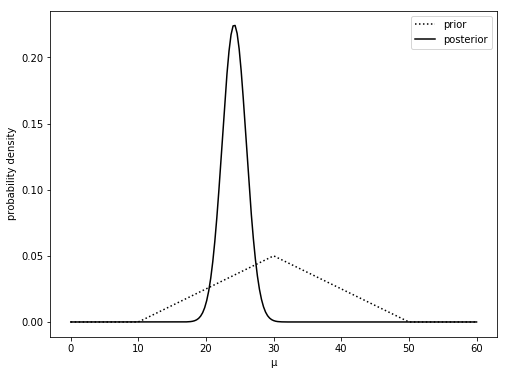

In [45]:
data=[20, 27, 23.5, 28.2, 21]
prior_1=prior
for i in data:
    unnormalized_posterior = prior_1 * cal_likelihood(i)
    prior_1 = unnormalized_posterior
area = sp.integrate.trapz(unnormalized_posterior, mu)
print('Normalization constant of posterior:', area)

posterior = unnormalized_posterior / area

plt.figure(figsize=(8, 6))
plt.plot(mu, prior, color='black', linestyle=':', label='prior')
plt.plot(mu, posterior, color='black', label='posterior')
plt.xlabel('μ')
plt.ylabel('probability density')
plt.legend()
plt.show()

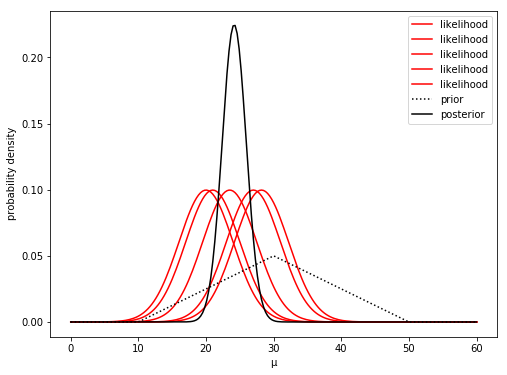

In [47]:
plt.figure(figsize=(8, 6))

for i in data:
    plt.plot(mu, cal_likelihood(i), color='red', label='likelihood')
plt.plot(mu, prior, color='black', linestyle=':', label='prior')
plt.plot(mu, posterior, color='black', label='posterior')
plt.xlabel('μ')
plt.ylabel('probability density')
plt.legend()
plt.show()